# IMPORTS

First we started with some python imports. For model building we used the <mark>**segmentation_models_pytorch library**</mark>. This has library has a lot segmentation model architechtures. Before you can import the library it needs to be ensured that the library is installed in the conda environment. For this in the anaconda terminal just type the below command to install the library:-

<div class="alert alert-block alert-success">
<b>Conda Command:</b> conda install -q segmentation-models-pytorch
</div>

Once, the libray is installed it can be imported in the script safely. We also imported the utility script Trainer for model training.

In [1]:
import pandas as pd
import numpy as np
import segmentation_models_pytorch as smp
from Utilities.Trainer import Trainer
import torch
import torch.nn as nn
from torchvision import models
import torch.multiprocessing as mp
import matplotlib.pyplot as plt
%matplotlib inline

The below statement helps in better error tracking when training is done in cuda. More details about this can be found in the below url:-

https://pytorch.org/docs/stable/notes/cuda.html

In [2]:
CUDA_LAUNCH_BLOCKING="1"

# Model Building

Next a Unet model with Resnet34 encoder was created with imagenet weights from the smp library.

In [3]:
torch.manual_seed(42)
ENCODER = 'resnet34'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = 6
ACTIVATION = None # could be None for logits or 'softmax2d' for multiclass segmentation

# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    in_channels=3,
    classes=CLASSES, 
    activation=ACTIVATION,
)
print(model)

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

# Model Training

Next the model training was started with 20 epochs and initial learning rate as 5e-04. The model checkpoint was saved whenever the validation dice was reported the greater than the previous best validation dice.

In [4]:
lr = 5e-04
epochs = 20
path = "./Models/model_unet.pth"

In [5]:
model_trainer = Trainer(model, lr, epochs, path)
print(f"Current Device is GPU: {torch.cuda.current_device()}")
print(f"Total memory allocated in GB: {round(torch.cuda.memory_allocated(0)/1024**3,1)}")
print(f"Total memory cached in GB: {round(torch.cuda.memory_reserved(0)/1024**3,1)}")
model_trainer.start()

  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Current Device is GPU: 0
Total memory allocated in GB: 0.3
Total memory cached in GB: 0.6
Learning Rate =  0.0005
Starting epoch: 0 | phase: train | ⏰: 10:57:58


100%|███████████████████████████████████████████████████████████████████| 310/310 [04:06<00:00,  1.26it/s, loss=0.0494]
C:\Users\SIDDHARTA\OneDrive\Documents\NEU-DET\Utilities\Meter.py:40: RuntimeWarning: Mean of empty slice
  dice_neg = np.nanmean(self.dice_neg_scores)
  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.3955 | IoU: 0.0200 | dice: 0.0358 | dice_neg: nan | dice_pos: 0.0358
Starting epoch: 0 | phase: val | ⏰: 11:02:05


100%|███████████████████████████████████████████████████████████████████| 133/133 [00:48<00:00,  2.74it/s, loss=0.0399]


Loss: 0.3189 | IoU: 0.0072 | dice: 0.0135 | dice_neg: nan | dice_pos: 0.0135
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 1 | phase: train | ⏰: 11:02:55


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.2834 | IoU: 0.0295 | dice: 0.0455 | dice_neg: nan | dice_pos: 0.0455
Starting epoch: 1 | phase: val | ⏰: 11:08:15


100%|███████████████████████████████████████████████████████████████████| 133/133 [00:49<00:00,  2.66it/s, loss=0.0292]


Loss: 0.2336 | IoU: 0.0726 | dice: 0.0965 | dice_neg: nan | dice_pos: 0.0965
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 2 | phase: train | ⏰: 11:09:06


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.2284 | IoU: 0.0735 | dice: 0.0985 | dice_neg: nan | dice_pos: 0.0985
Starting epoch: 2 | phase: val | ⏰: 11:15:16


100%|███████████████████████████████████████████████████████████████████| 133/133 [00:47<00:00,  2.77it/s, loss=0.0255]


Loss: 0.2039 | IoU: 0.1361 | dice: 0.1815 | dice_neg: nan | dice_pos: 0.1815
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 3 | phase: train | ⏰: 11:16:04


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.2026 | IoU: 0.1084 | dice: 0.1433 | dice_neg: nan | dice_pos: 0.1433
Starting epoch: 3 | phase: val | ⏰: 11:21:25


100%|████████████████████████████████████████████████████████████████████| 133/133 [00:49<00:00,  2.69it/s, loss=0.023]


Loss: 0.1836 | IoU: 0.1747 | dice: 0.2245 | dice_neg: nan | dice_pos: 0.2245
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 4 | phase: train | ⏰: 11:22:15


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1851 | IoU: 0.1546 | dice: 0.1988 | dice_neg: nan | dice_pos: 0.1988
Starting epoch: 4 | phase: val | ⏰: 11:27:35


100%|███████████████████████████████████████████████████████████████████| 133/133 [00:48<00:00,  2.73it/s, loss=0.0198]


Loss: 0.1585 | IoU: 0.2154 | dice: 0.2611 | dice_neg: nan | dice_pos: 0.2611
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 5 | phase: train | ⏰: 11:28:25


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1637 | IoU: 0.2071 | dice: 0.2625 | dice_neg: nan | dice_pos: 0.2625
Starting epoch: 5 | phase: val | ⏰: 11:33:45


100%|███████████████████████████████████████████████████████████████████| 133/133 [00:48<00:00,  2.75it/s, loss=0.0159]


Loss: 0.1275 | IoU: 0.2336 | dice: 0.2785 | dice_neg: nan | dice_pos: 0.2785
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 6 | phase: train | ⏰: 11:34:34


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1472 | IoU: 0.2604 | dice: 0.3294 | dice_neg: nan | dice_pos: 0.3294
Starting epoch: 6 | phase: val | ⏰: 11:39:54


100%|███████████████████████████████████████████████████████████████████| 133/133 [08:44<00:00,  3.95s/it, loss=0.0137]


Loss: 0.1097 | IoU: 0.4190 | dice: 0.5181 | dice_neg: nan | dice_pos: 0.5181
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 7 | phase: train | ⏰: 11:48:40


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1362 | IoU: 0.3676 | dice: 0.4680 | dice_neg: nan | dice_pos: 0.4680
Starting epoch: 7 | phase: val | ⏰: 11:50:31


100%|███████████████████████████████████████████████████████████████████| 133/133 [00:48<00:00,  2.73it/s, loss=0.0137]


Loss: 0.1096 | IoU: 0.4965 | dice: 0.6251 | dice_neg: nan | dice_pos: 0.6251
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 8 | phase: train | ⏰: 11:51:20


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1201 | IoU: 0.4766 | dice: 0.6015 | dice_neg: nan | dice_pos: 0.6015
Starting epoch: 8 | phase: val | ⏰: 11:56:39


100%|████████████████████████████████████████████████████████████████████| 133/133 [00:48<00:00,  2.73it/s, loss=0.013]


Loss: 0.1043 | IoU: 0.5390 | dice: 0.6578 | dice_neg: nan | dice_pos: 0.6578
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 9 | phase: train | ⏰: 11:57:29


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1156 | IoU: 0.5165 | dice: 0.6446 | dice_neg: nan | dice_pos: 0.6446
Starting epoch: 9 | phase: val | ⏰: 12:02:49


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.1052 | IoU: 0.5064 | dice: 0.6154 | dice_neg: nan | dice_pos: 0.6154

Learning Rate =  0.0005
Starting epoch: 10 | phase: train | ⏰: 12:03:38


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.1026 | IoU: 0.5697 | dice: 0.6985 | dice_neg: nan | dice_pos: 0.6985
Starting epoch: 10 | phase: val | ⏰: 12:08:58


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:48<00:00,  2.74it/s, loss=0.00992]


Loss: 0.0794 | IoU: 0.6126 | dice: 0.7393 | dice_neg: nan | dice_pos: 0.7393
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 11 | phase: train | ⏰: 12:09:47


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0957 | IoU: 0.5833 | dice: 0.7115 | dice_neg: nan | dice_pos: 0.7115
Starting epoch: 11 | phase: val | ⏰: 12:15:08


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0848 | IoU: 0.6059 | dice: 0.7340 | dice_neg: nan | dice_pos: 0.7340

Learning Rate =  0.0005
Starting epoch: 12 | phase: train | ⏰: 12:18:31


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0944 | IoU: 0.5851 | dice: 0.7137 | dice_neg: nan | dice_pos: 0.7137
Starting epoch: 12 | phase: val | ⏰: 12:23:12


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:49<00:00,  2.71it/s, loss=0.00933]


Loss: 0.0747 | IoU: 0.6439 | dice: 0.7646 | dice_neg: nan | dice_pos: 0.7646
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 13 | phase: train | ⏰: 12:24:02


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0881 | IoU: 0.6038 | dice: 0.7311 | dice_neg: nan | dice_pos: 0.7311
Starting epoch: 13 | phase: val | ⏰: 12:44:47


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:21<00:00,  6.30it/s, loss=0.00956]


Loss: 0.0765 | IoU: 0.6492 | dice: 0.7701 | dice_neg: nan | dice_pos: 0.7701
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 14 | phase: train | ⏰: 12:45:09


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0823 | IoU: 0.6288 | dice: 0.7540 | dice_neg: nan | dice_pos: 0.7540
Starting epoch: 14 | phase: val | ⏰: 12:46:43


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:38<00:00,  3.44it/s, loss=0.00817]


Loss: 0.0653 | IoU: 0.6730 | dice: 0.7893 | dice_neg: nan | dice_pos: 0.7893
******** New optimal found, saving state ********


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 15 | phase: train | ⏰: 12:47:23


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0802 | IoU: 0.6336 | dice: 0.7562 | dice_neg: nan | dice_pos: 0.7562
Starting epoch: 15 | phase: val | ⏰: 12:52:02


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0678 | IoU: 0.6217 | dice: 0.7422 | dice_neg: nan | dice_pos: 0.7422

Learning Rate =  0.0005
Starting epoch: 16 | phase: train | ⏰: 12:52:51


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0782 | IoU: 0.6337 | dice: 0.7559 | dice_neg: nan | dice_pos: 0.7559
Starting epoch: 16 | phase: val | ⏰: 13:06:26


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0783 | IoU: 0.5907 | dice: 0.7148 | dice_neg: nan | dice_pos: 0.7148

Learning Rate =  0.0005
Starting epoch: 17 | phase: train | ⏰: 13:06:46


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0739 | IoU: 0.6393 | dice: 0.7620 | dice_neg: nan | dice_pos: 0.7620
Starting epoch: 17 | phase: val | ⏰: 13:09:48


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0647 | IoU: 0.6388 | dice: 0.7528 | dice_neg: nan | dice_pos: 0.7528

Learning Rate =  0.0005
Starting epoch: 18 | phase: train | ⏰: 13:10:36


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Loss: 0.0694 | IoU: 0.6624 | dice: 0.7816 | dice_neg: nan | dice_pos: 0.7816
Starting epoch: 18 | phase: val | ⏰: 13:15:55


  0%|                                                                                          | 0/310 [00:00<?, ?it/s]

Loss: 0.0711 | IoU: 0.6531 | dice: 0.7698 | dice_neg: nan | dice_pos: 0.7698
Epoch    19: reducing learning rate of group 0 to 5.0000e-05.

Learning Rate =  5e-05
Starting epoch: 19 | phase: train | ⏰: 13:16:44


100%|██████████████████████████████████████████████████████████████████| 310/310 [26:05<00:00,  5.05s/it, loss=0.00787]


Loss: 0.0630 | IoU: 0.6879 | dice: 0.8033 | dice_neg: nan | dice_pos: 0.8033


  0%|                                                                                          | 0/133 [00:00<?, ?it/s]

Starting epoch: 19 | phase: val | ⏰: 13:42:50


100%|██████████████████████████████████████████████████████████████████| 133/133 [00:18<00:00,  7.21it/s, loss=0.00806]


Loss: 0.0645 | IoU: 0.6776 | dice: 0.7942 | dice_neg: nan | dice_pos: 0.7942
******** New optimal found, saving state ********



After the model training was done the loss, dice_scores and iou_scores were plotted. 

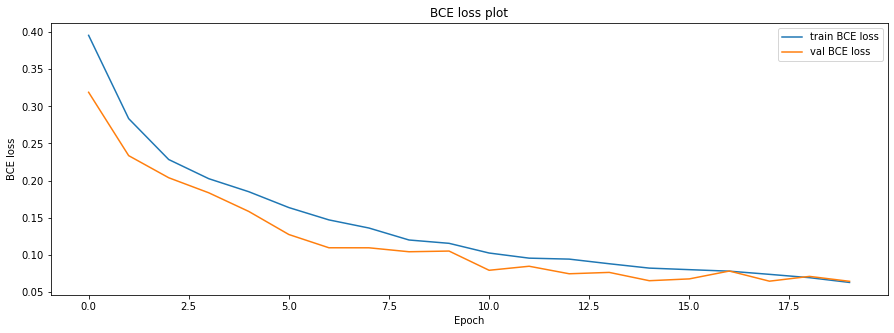

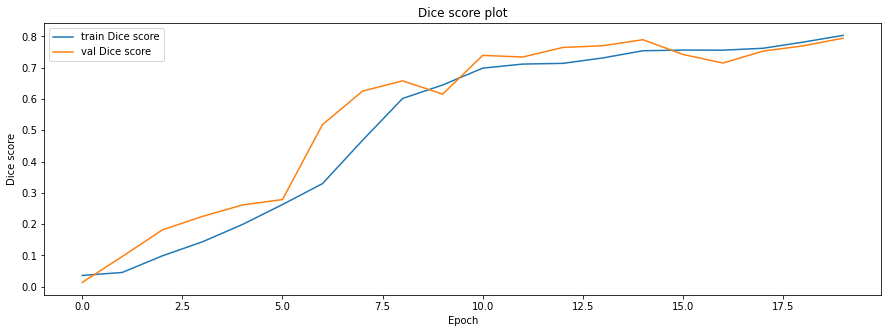

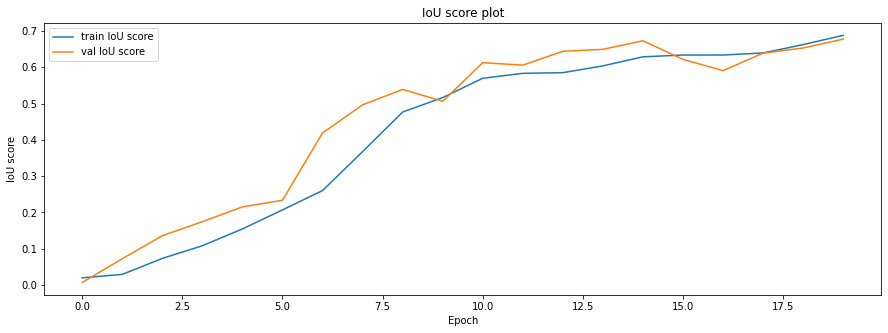

In [6]:
losses = model_trainer.losses
dice_scores = model_trainer.dice_scores # overall dice
iou_scores = model_trainer.iou_scores

def plot(scores, name):
    plt.figure(figsize=(15,5))
    plt.plot(range(len(scores["train"])), scores["train"], label=f'train {name}')
    plt.plot(range(len(scores["train"])), scores["val"], label=f'val {name}')
    plt.title(f'{name} plot'); plt.xlabel('Epoch'); plt.ylabel(f'{name}');
    plt.legend(); 
    plt.show()

plot(losses, "BCE loss")
plot(dice_scores, "Dice score")
plot(iou_scores, "IoU score")

From the above results it can be concluded that the loss, Dice and IOU get's reaches plateau after epoch 15. So, it can be concluded that it's not worth training the model after 20 epochs.

# Convert to ONNX

Lastly the trained model is converted to ONNX format using the Utility script ONNX_Converter.py.

In [7]:
! python ./Utilities/ONNX_converter.py Unet resnet34  imagenet  6 ./Models/model_unet.pth ./ONNX_models/unet.onnx

Model name :Unet
Model checkpoint path is :./Models/model_unet.pth
Model output path is :./ONNX_models/unet.onnx
Successfully converted the model to onnx format.
